Car Price Prediction With Machine Learning

In [35]:
import pandas as pd,numpy as np,matplotlib.pyplot as plt,seaborn as sns,warnings
warnings.simplefilter(action='ignore')
%matplotlib inline
df=pd.read_csv("T4DS.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Data Pre-Processing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df.shape

(301, 9)

In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [36]:
df['Age']=2024-df['Year']

In [39]:
df=df.drop(['Car_Name'],axis=1)
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


EDA

In [40]:
df.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type',
       'Selling_type', 'Transmission', 'Owner', 'Age'],
      dtype='object')

In [41]:
df=df.rename(columns={'Selling_Price':'SP','Present_Price':'PP','Driven_kms':'Distance','Selling_type':'Seller'})

In [42]:
df.columns

Index(['Year', 'SP', 'PP', 'Distance', 'Fuel_Type', 'Seller', 'Transmission',
       'Owner', 'Age'],
      dtype='object')

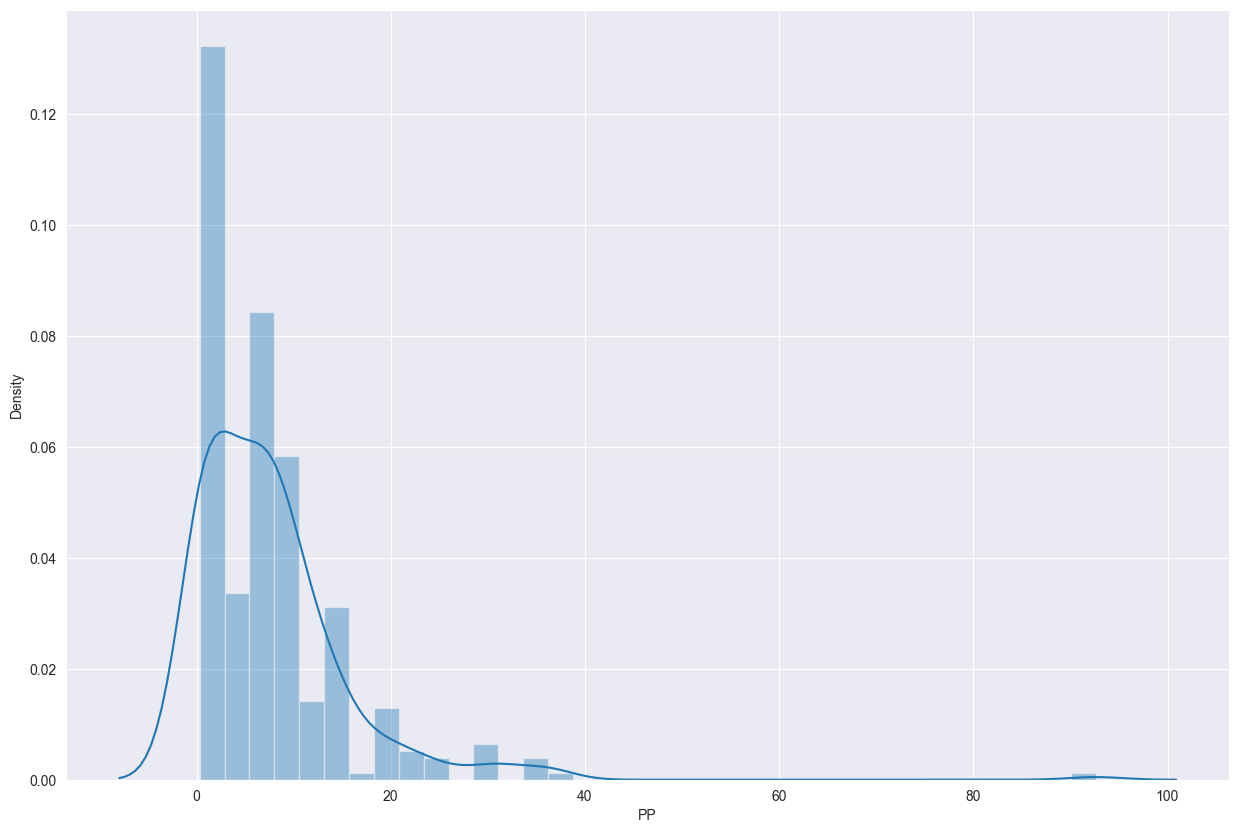

In [43]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,10))
sns.distplot(df['PP'])
plt.show()

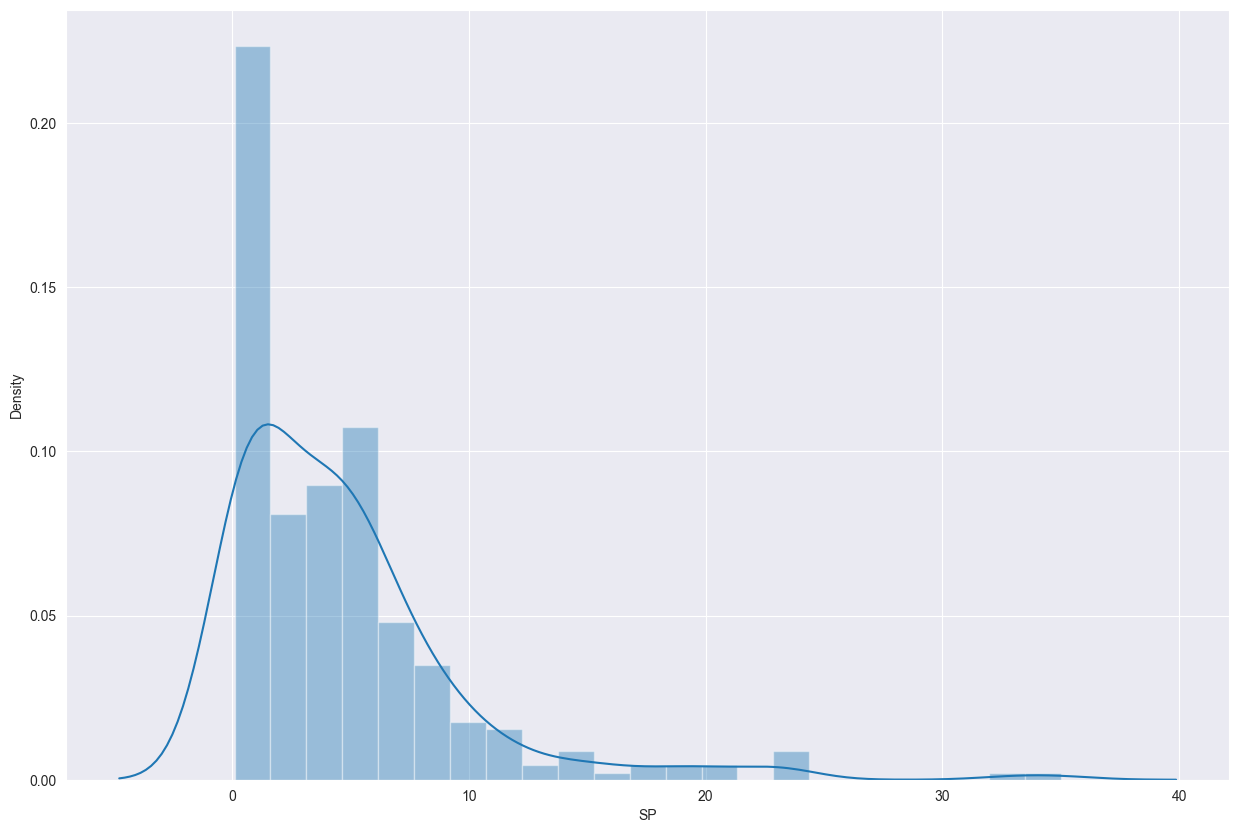

In [29]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,10))
sns.distplot(df['SP'])
plt.show()

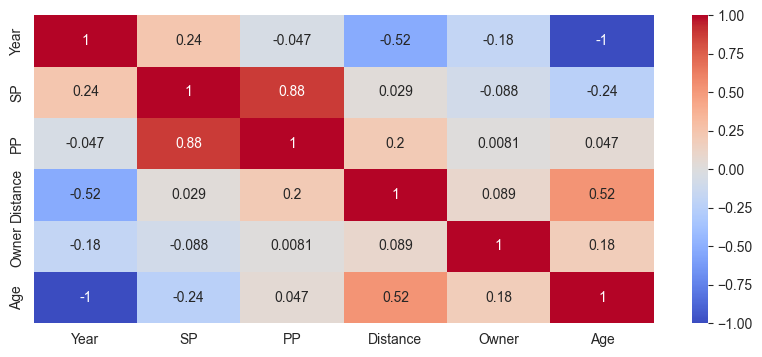

In [49]:
abc=pd.DataFrame()
abc=df.drop(['Fuel_Type', 'Seller', 'Transmission'],axis=1)
data=abc.corr()
plt.figure(figsize=(10,4))
sns.heatmap(data,cmap='coolwarm',annot=True)
plt.show()

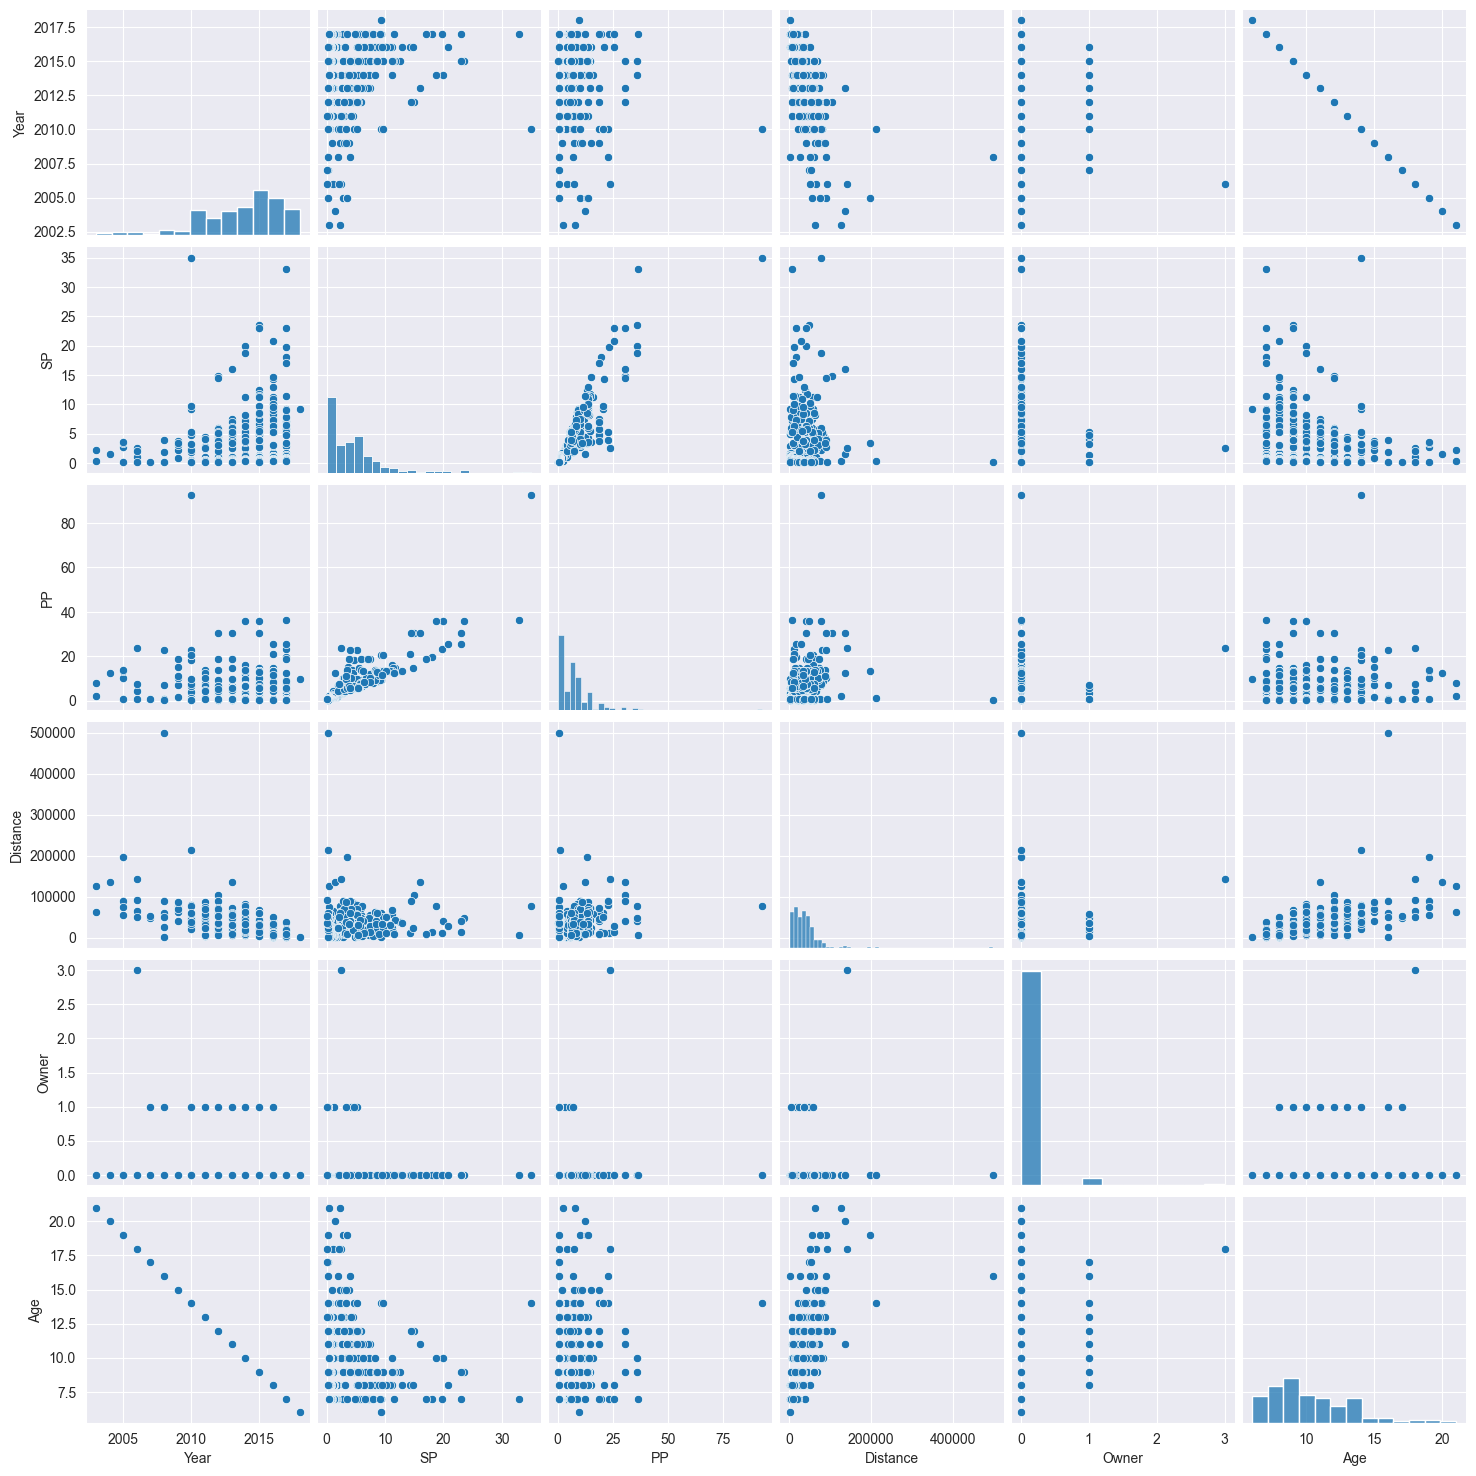

In [53]:
sns.pairplot(df)
plt.show()

In [58]:

abc=pd.get_dummies(data=df,drop_first=True)
abc=abc.drop(['Year'],axis=1)
abc=abc.replace({True:1,False:0})
abc.head()

,SP,PP,Distance,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,0,1,0,1
1,4.75,9.54,43000,0,11,1,0,0,1
2,7.25,9.85,6900,0,7,0,1,0,1
3,2.85,4.15,5200,0,13,0,1,0,1
4,4.60,6.87,42450,0,10,1,0,0,1


Prediction Model

In [61]:
y=abc['SP']
X=abc.drop(['SP'],axis=1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
print(f"x train{X_train.shape}\nx test{X_test.shape}\ny train{y_train.shape}\ny test{y_test.shape}")

x train(240, 8)
x test(61, 8)
y train(240,)
y test(61,)


In [66]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [76]:
predict=model.predict(X_train.head(1))
X_train.head(1)

,PP,Distance,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Individual,Transmission_Manual
102,1.78,4000,0,7,0,1,1,1


In [75]:
import pickle as pk
pk.dump(model,open('car.sav','wb'))